In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
import numpy as np
from sklearn.model_selection import cross_val_score
%run ploting_utils_v1.ipynb
from sklearn.model_selection import cross_val_score
from pycm import *
import warnings
import shap
import lime
from lime import lime_tabular
%run confusion_matrix_pretty_print.ipynb

In [2]:
df=pd.read_csv('train_COMBO.csv')
df.replace(to_replace=' ',value=np.nan,inplace=True)
#df.drop(columns=['Unnamed: 0'],inplace=True)
df1=pd.read_csv('test_COMBO.csv')
df1.replace(to_replace=' ',value=np.nan,inplace=True)
#df1.drop(columns=['Unnamed: 0'],inplace=True)
x_train=df.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_train=df['Last_Birth_a_Caesarean_Section']
x_test=df1.drop(columns=['Last_Birth_a_Caesarean_Section'])
y_test=df1['Last_Birth_a_Caesarean_Section']

In [3]:
df_main=pd.concat([df,df1],axis=0)
df_main

,Age_of_Mother,Type_of_place_of_residence,Mothers_Education,Number_of_household_members_,Total_children_ever_born,Births_in_last_five_years,Number_of_living_children,Ever_had_a_terminated_pregnancy,Sources_of_Drinking_Water,Household_Toilet_Facility,...,Smoker,Husbands_Education,Husbands_Occupations,Mothers_Occupation,Decision_Making_Power_on_Delivery_Palce,Suffered_by_Domestic_Violence,Number_of_ANC_Visits,Had_Previous_C-section,Size_of_child_at_birth,Last_Birth_a_Caesarean_Section
0,27,1,1,10,2,2,2,1,0,0,...,0,2,4,0,2,1,2,0,3,0
1,32,2,0,8,6,2,4,0,1,0,...,0,1,4,0,1,1,1,1,4,1
2,37,1,2,7,5,1,5,0,1,1,...,0,2,3,0,1,0,8,1,3,1
3,29,2,1,14,6,2,3,0,1,1,...,0,0,4,0,1,0,2,0,3,0
4,31,2,0,5,3,3,3,0,0,0,...,0,2,4,0,1,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,27,2,0,24,6,2,5,0,0,1,...,0,2,3,0,3,0,3,0,3,0
7882,21,1,2,4,1,1,1,0,1,1,...,0,2,4,0,1,0,8,1,3,1
7883,35,2,0,8,7,1,6,0,1,0,...,0,2,1,0,1,0,0,0,3,0
7884,24,1,1,17,1,1,1,0,1,1,...,0,2,3,0,1,0,4,1,3,1


In [4]:
x=df_main.drop(columns=['Last_Birth_a_Caesarean_Section'])
y=df_main['Last_Birth_a_Caesarean_Section']

In [5]:
df

,Age_of_Mother,Type_of_place_of_residence,Mothers_Education,Number_of_household_members_,Total_children_ever_born,Births_in_last_five_years,Number_of_living_children,Ever_had_a_terminated_pregnancy,Sources_of_Drinking_Water,Household_Toilet_Facility,...,Smoker,Husbands_Education,Husbands_Occupations,Mothers_Occupation,Decision_Making_Power_on_Delivery_Palce,Suffered_by_Domestic_Violence,Number_of_ANC_Visits,Had_Previous_C-section,Size_of_child_at_birth,Last_Birth_a_Caesarean_Section
0,27,1,1,10,2,2,2,1,0,0,...,0,2,4,0,2,1,2,0,3,0
1,32,2,0,8,6,2,4,0,1,0,...,0,1,4,0,1,1,1,1,4,1
2,37,1,2,7,5,1,5,0,1,1,...,0,2,3,0,1,0,8,1,3,1
3,29,2,1,14,6,2,3,0,1,1,...,0,0,4,0,1,0,2,0,3,0
4,31,2,0,5,3,3,3,0,0,0,...,0,2,4,0,1,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,30,1,3,5,4,2,4,1,1,1,...,0,3,3,1,0,0,9,0,3,0
18394,30,2,0,8,4,2,4,0,1,1,...,0,0,4,0,2,1,3,0,3,0
18395,24,1,2,11,2,2,2,0,1,1,...,0,3,2,0,2,1,6,1,3,1
18396,23,2,0,13,4,3,3,0,1,0,...,0,0,4,1,2,1,0,0,4,0


In [6]:
df1

,Age_of_Mother,Type_of_place_of_residence,Mothers_Education,Number_of_household_members_,Total_children_ever_born,Births_in_last_five_years,Number_of_living_children,Ever_had_a_terminated_pregnancy,Sources_of_Drinking_Water,Household_Toilet_Facility,...,Smoker,Husbands_Education,Husbands_Occupations,Mothers_Occupation,Decision_Making_Power_on_Delivery_Palce,Suffered_by_Domestic_Violence,Number_of_ANC_Visits,Had_Previous_C-section,Size_of_child_at_birth,Last_Birth_a_Caesarean_Section
0,32,1,2,14,3,2,3,0,0,0,...,0,2,4,0,1,0,6,1,3,1
1,28,1,0,18,6,2,6,0,1,1,...,0,1,4,0,2,0,1,0,3,0
2,24,2,0,4,3,2,2,0,1,1,...,0,2,4,0,1,1,0,0,3,0
3,33,1,0,24,5,1,5,0,1,1,...,0,2,2,0,2,1,2,0,3,0
4,24,2,1,10,2,1,2,0,1,1,...,0,0,4,0,3,1,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,27,2,0,24,6,2,5,0,0,1,...,0,2,3,0,3,0,3,0,3,0
7882,21,1,2,4,1,1,1,0,1,1,...,0,2,4,0,1,0,8,1,3,1
7883,35,2,0,8,7,1,6,0,1,0,...,0,2,1,0,1,0,0,0,3,0
7884,24,1,1,17,1,1,1,0,1,1,...,0,2,3,0,1,0,4,1,3,1


In [7]:
import pickle 


In [8]:
HGSORF_clf= pickle.load(open('optimized_RF_model_usingHGSO.sav','rb'))
GBC= pickle.load(open('gradient_boosting_classifier.sav','rb'))
LR= pickle.load(open('logisticReg_csec.sav','rb'))
LDA_clf=pickle.load(open('lda_csec.sav','rb'))
KNN_clf=pickle.load(open('knn_csec.sav','rb'))
GNB_clf=pickle.load(open('gnb_csec.sav','rb'))


In [9]:
proba_dic=dict(
    HGSORF= HGSORF_clf.predict_proba(x_test)[:,1],
    GNB=GNB_clf.predict_proba(x_test)[:,1],
    LDA=LDA_clf.predict_proba(x_test)[:,1],
    KNN=KNN_clf.predict_proba(x_test)[:,1],
    #RF=RF.predict_proba(x_test)[:,1],
    #LGBM=LGBM.predict_proba(x_test)[:,1],
    GBC=GBC.predict_proba(x_test)[:,1],
    LR=LR.predict_proba(x_test)[:,1]

    )

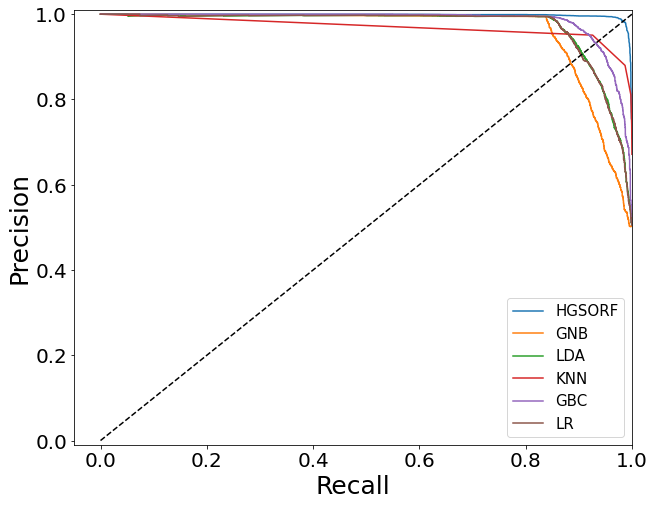

In [10]:
plot_multi_precison_vs_recall_curve(proba_dic,y_test,'Precision_Recall_Curve_CS.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


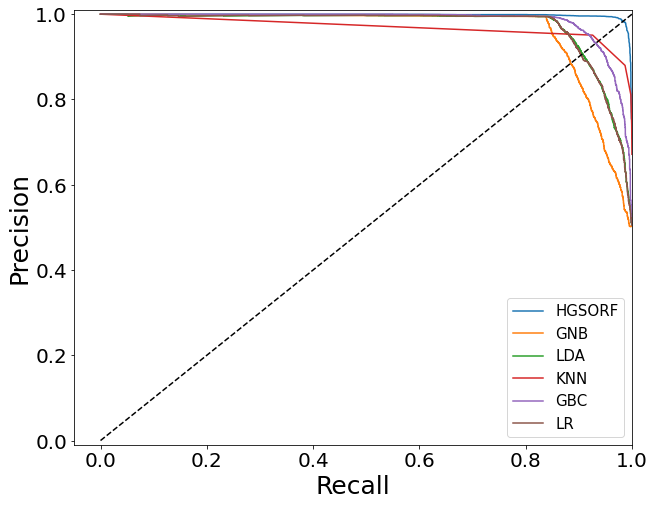

In [11]:
plot_multi_precison_vs_recall_curve(proba_dic,y_test,'Precision_Recall_Curve_CS.eps')

In [12]:
x_train_new = x_train
y_train_new = y_train
x_test_new = x_test
y_test_new = y_test


def est(clf, names):
    estm = []
    for i in range(len(clf)):
        n = names[i]
        claf = clf[i]
        estm.append((n, claf))
    return estm


clf = [HGSORF_clf, GNB_clf, LDA_clf, KNN_clf, GBC, LR]
name = ['HGSORF', 'GNB', 'LDA', 'KNN', 'GBC', 'LR']
est_1 = est(clf, name)
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}

for algorithm, model in est_1:
    y_pred = model.predict(x_test_new)
    y_prob = model.predict_proba(x_test_new)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob

    cross_val_scores[algorithm] = cross_val_score(model,
                                                  x_train_new,
                                                  y_train_new,
                                                  cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test_new, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test_new, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test_new, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test_new, y_pred)
    ppv_scores[algorithm] = precision_score(y_test_new,
                                            y_pred,
                                            average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test_new,
                                                 y_pred,
                                                 average="weighted")
    confusion_matrix_ = confusion_matrix(y_test_new, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP / (FP + TN)).mean()
    specificity_scores[algorithm] = (TN / (TN + FP)).mean()
    threat_scores[algorithm] = (TP / (TP + FN + FP)).mean()
    balanced_accuracy_scores[algorithm] = (
        (sensitivity_scores[algorithm] + specificity_scores[algorithm]) /
        2).mean()
    print('done for one')

done for one
done for one
done for one
done for one
done for one


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

done for one


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [13]:
performance_metrics = {
    'Cross_val_scores': cross_val_scores,
    'Accuracy_scores': accuracy_scores,
    'Error_scores': error_scores,
    'F1_scores': f1_scores,
    'FPR_scores': fpr_scores,
    'Kappa_scores': kappa_scores,
    'MCC_scores': mcc_scores,
    'PPV_scores': ppv_scores,
    'Sensitivity_scores': sensitivity_scores,
    'Specificity_scores': specificity_scores,
    'Threat_scores': threat_scores,
    'Balanced_accuracy_scores': balanced_accuracy_scores
}

perfo_m = pd.DataFrame(performance_metrics)
#perfo_m.to_csv('performance_metrics_csection.csv')
perfo_m

,Cross_val_scores,Accuracy_scores,Error_scores,F1_scores,FPR_scores,Kappa_scores,MCC_scores,PPV_scores,Sensitivity_scores,Specificity_scores,Threat_scores,Balanced_accuracy_scores
HGSORF,0.979454,0.983388,0.016612,0.983387,0.016639,0.966774,0.966843,0.983456,0.983388,0.983361,0.967316,0.983375
GNB,0.881292,0.873573,0.126427,0.873526,0.126330,0.747192,0.747895,0.874302,0.873573,0.873670,0.775474,0.873622
LDA,0.922329,0.918970,0.081030,0.918465,0.081380,0.837824,0.847811,0.928960,0.918970,0.918620,0.849241,0.918795
KNN,0.882705,0.883211,0.116789,0.881716,0.116268,0.766661,0.787645,0.904603,0.883211,0.883732,0.788792,0.883471
GBC,0.932764,0.932031,0.067969,0.931798,0.068227,0.863990,0.869526,0.937550,0.932031,0.931773,0.872300,0.931902
LR,0.926296,0.922394,0.077606,0.922071,0.077891,0.844697,0.851304,0.928983,0.922394,0.922109,0.855412,0.922251


In [14]:
df_pred3 = pd.DataFrame(proba_dic)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


HGSORF
  AUC: 0.998
GNB
  AUC: 0.945
LDA
  AUC: 0.967
KNN
  AUC: 0.97
GBC
  AUC: 0.982
LR
  AUC: 0.967


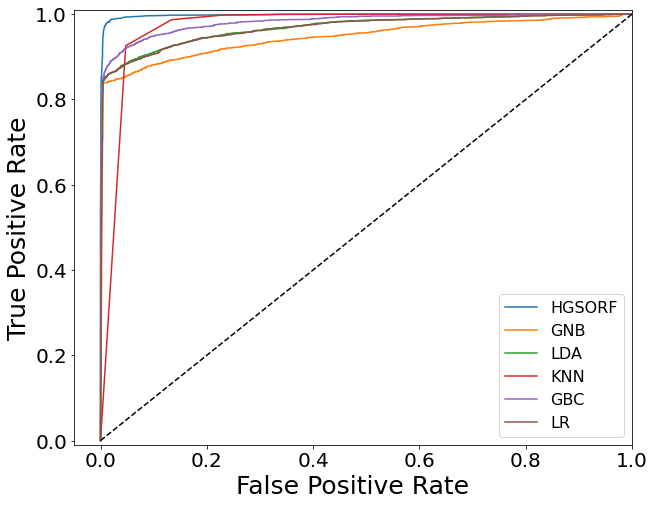

In [15]:
filename = 'ROC_curve_CS.eps'
plot_roc_curves(df_pred3, y_test, filename)

HGSORF
  AUC: 0.998
GNB
  AUC: 0.945
LDA
  AUC: 0.967
KNN
  AUC: 0.97
GBC
  AUC: 0.982
LR
  AUC: 0.967


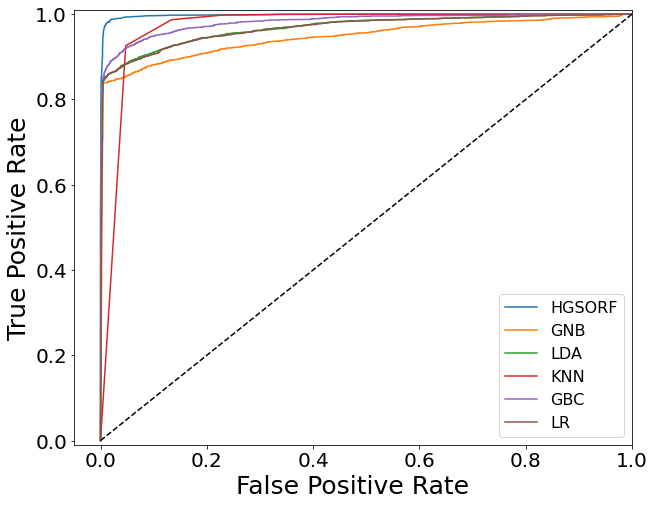

In [16]:
filename = 'ROC_curve_CS.png'
plot_roc_curves(df_pred3, y_test, filename)

In [17]:
res_df1 = dict(HGSORF=cross_val_score(HGSORF_clf, x, y, cv=10),
               GNB=cross_val_score(GNB_clf, x, y, cv=10),
               LDA=cross_val_score(LDA_clf, x, y, cv=10),
               KNN=cross_val_score(KNN_clf, x, y, cv=10),
               GBC=cross_val_score(GBC, x, y, cv=10),
               LR=cross_val_score(LR, x, y, cv=10))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

In [18]:
res_df3 = pd.DataFrame(res_df1)
#res_df3.to_csv('cross_vali.csv',index=False)

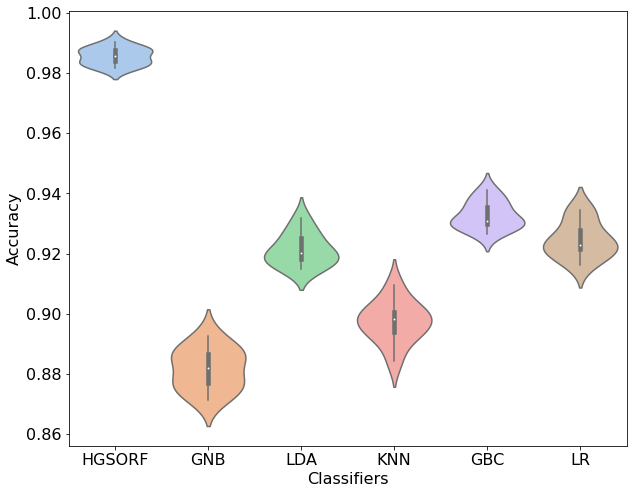

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel('Classifiers', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
sns.violinplot(ax=ax,
               data=res_df3.iloc[:, 0:8],
               palette='pastel',
               scale='width')
plt.savefig('violin_plot_CS.eps', dpi=600)

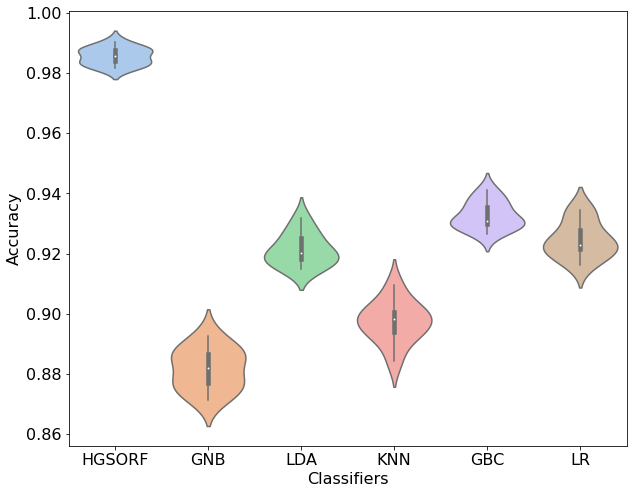

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel('Classifiers', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
sns.violinplot(ax=ax,
               data=res_df3.iloc[:, 0:8],
               palette='pastel',
               scale='width')
plt.savefig('violin_plot_CS.png', dpi=600)

In [21]:
proba_R_D_curve = dict(HGSORF=HGSORF_clf.predict_proba(x_test),
                       GNB=GNB_clf.predict_proba(x_test),
                       LDA=LDA_clf.predict_proba(x_test),
                       KNN=KNN_clf.predict_proba(x_test),
                       GBC=GBC.predict_proba(x_test),
                       LR=LR.predict_proba(x_test))

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


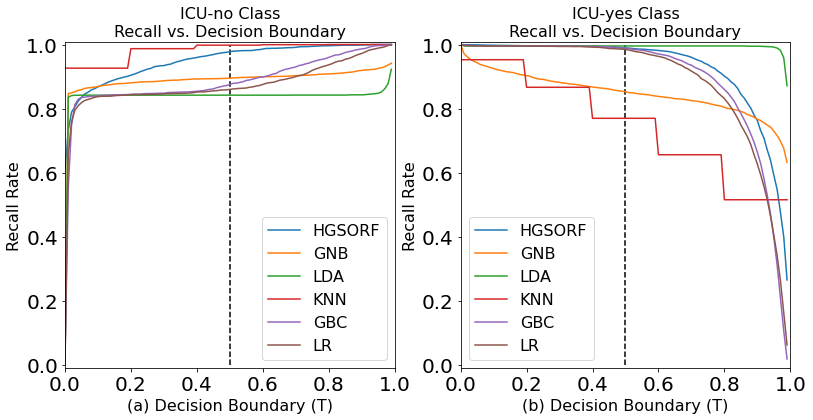

In [22]:
filename = 'multi_recall_vs_decision_boundary_CS.png'
plot_multi_recall_vs_decision_boundary(proba_R_D_curve, y_test, filename)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially t

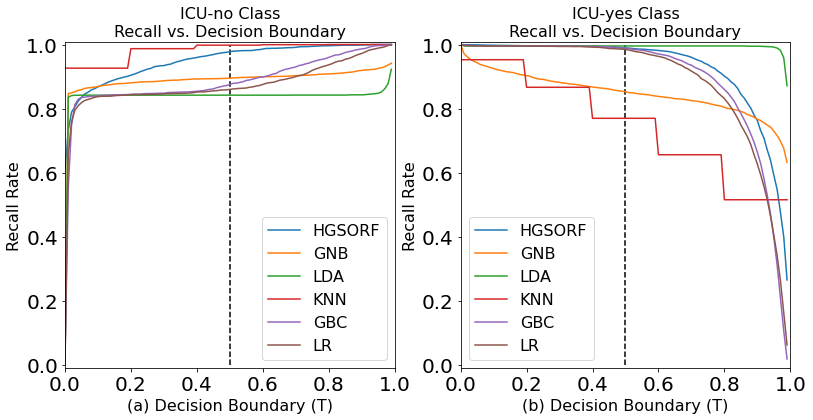

In [23]:
filename = 'multi_recall_vs_decision_boundary_CS.eps'
plot_multi_recall_vs_decision_boundary(proba_R_D_curve, y_test, filename)

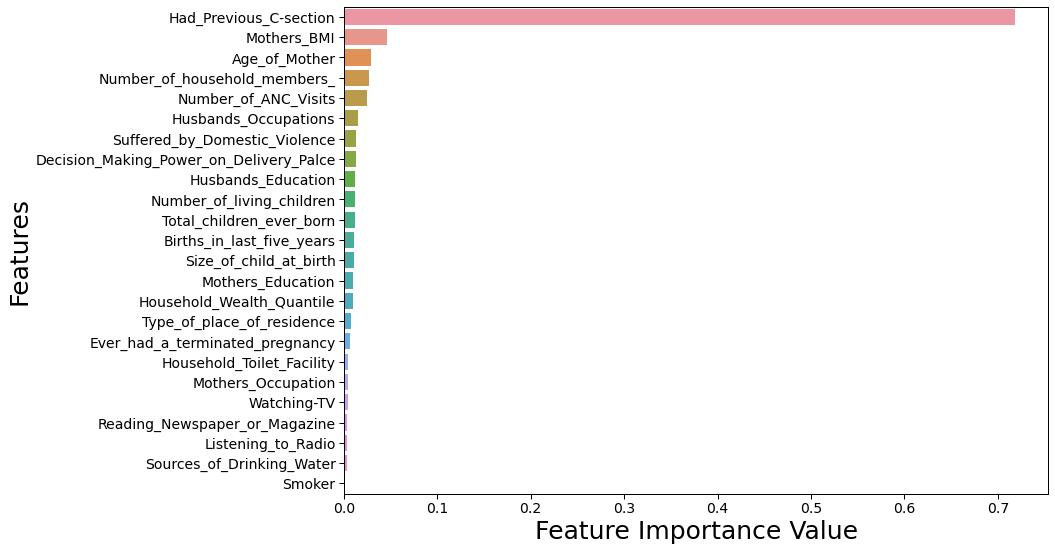

In [24]:
sns.set_context("paper",
                rc={
                    "font.size": 18,
                    "axes.titlesize": 20,
                    "axes.labelsize": 20
                })

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'font.size': 18})
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(
    zip(HGSORF_clf.feature_importances_, x_test.columns)),
                           columns=['Feature Importance Value', 'Features'])
params = {'axes.labelsize': 25}
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=15)
sns.barplot(x="Feature Importance Value",
            y="Features",
            data=feature_imp.sort_values(by="Feature Importance Value",
                                         ascending=False))
#plt.title('LightGBM Features (avg over folds)')

plt.tight_layout()

plt.savefig('FEA_importances_CS.png', dpi=600)
plt.show()

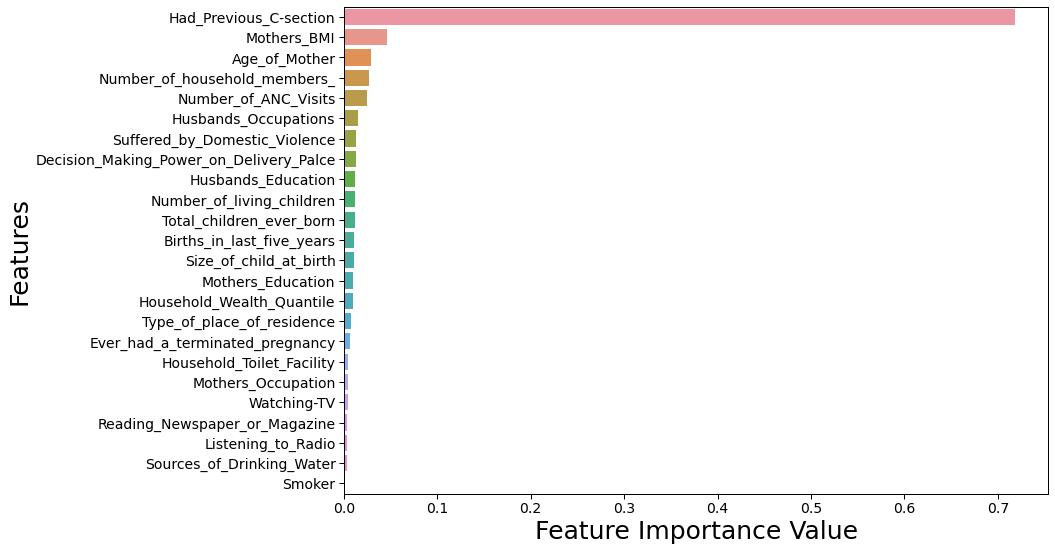

In [25]:
sns.set_context("paper",
                rc={
                    "font.size": 18,
                    "axes.titlesize": 20,
                    "axes.labelsize": 20
                })

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'font.size': 18})
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(
    zip(HGSORF_clf.feature_importances_, x_test.columns)),
                           columns=['Feature Importance Value', 'Features'])
params = {'axes.labelsize': 25}
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(15, 8))

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=15)
sns.barplot(x="Feature Importance Value",
            y="Features",
            data=feature_imp.sort_values(by="Feature Importance Value",
                                         ascending=False))
#plt.title('LightGBM Features (avg over folds)')

plt.tight_layout()

plt.savefig('FEA_importances_CS.eps', dpi=600)
plt.show()

In [26]:
df_performance = pd.read_csv('performance_metrics_csection.csv')
df_performance

,Unnamed: 0,Cross_val_scores,Accuracy_scores,Error_scores,F1_scores,FPR_scores,Kappa_scores,MCC_scores,PPV_scores,Sensitivity_scores,Specificity_scores,Threat_scores,Balanced_accuracy_scores
0,HGSORF,0.979454,0.983388,0.016612,0.983387,0.016639,0.966774,0.966843,0.983456,0.983388,0.983361,0.967316,0.983375
1,GNB,0.881292,0.873573,0.126427,0.873526,0.126330,0.747192,0.747895,0.874302,0.873573,0.873670,0.775474,0.873622
2,LDA,0.922329,0.918970,0.081030,0.918465,0.081380,0.837824,0.847811,0.928960,0.918970,0.918620,0.849241,0.918795
3,KNN,0.882705,0.883211,0.116789,0.881716,0.116268,0.766661,0.787645,0.904603,0.883211,0.883732,0.788792,0.883471
4,GBC,0.932764,0.932031,0.067969,0.931798,0.068227,0.863990,0.869526,0.937550,0.932031,0.931773,0.872300,0.931902
5,LR,0.926296,0.922394,0.077606,0.922071,0.077891,0.844697,0.851304,0.928983,0.922394,0.922109,0.855412,0.922251


In [27]:
df_performance1 = df_performance.T
df_performance1

,0,1,2,3,4,5
Unnamed: 0,HGSORF,GNB,LDA,KNN,GBC,LR
Cross_val_scores,0.979454,0.881292,0.922329,0.882705,0.932764,0.926296
Accuracy_scores,0.983388,0.873573,0.91897,0.883211,0.932031,0.922394
Error_scores,0.016612,0.126427,0.08103,0.116789,0.067969,0.077606
F1_scores,0.983387,0.873526,0.918465,0.881716,0.931798,0.922071
FPR_scores,0.016639,0.12633,0.08138,0.116268,0.068227,0.077891
Kappa_scores,0.966774,0.747192,0.837824,0.766661,0.86399,0.844697
MCC_scores,0.966843,0.747895,0.847811,0.787645,0.869526,0.851304
PPV_scores,0.983456,0.874302,0.92896,0.904603,0.93755,0.928983
Sensitivity_scores,0.983388,0.873573,0.91897,0.883211,0.932031,0.922394


In [28]:
df_performance1 = df_performance1.rename(columns=df_performance1.iloc[0]).drop(
    df_performance1.index[0])

In [29]:
df_performance1.drop(index=[
    'Cross_val_scores', 'Error_scores', 'FPR_scores', 'PPV_scores',
    'Specificity_scores', 'Threat_scores', 'Balanced_accuracy_scores'
],
                     inplace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


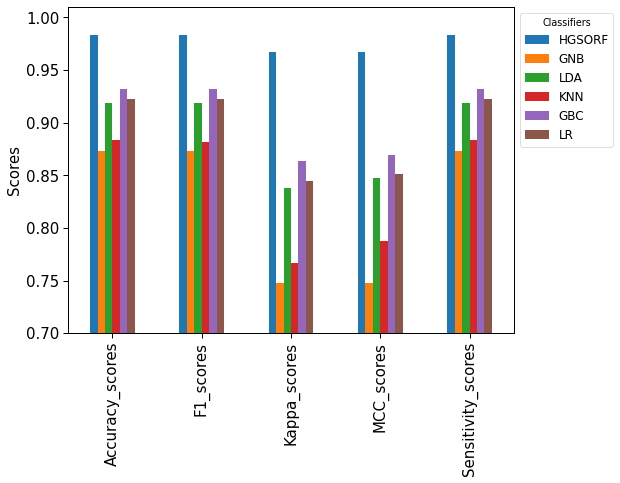

In [30]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
df_performance1.plot.bar(figsize=[8, 6], rot=90)
plt.ylim(.7, 1.01)
plt.ylabel('Scores', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title='Classifiers',
           bbox_to_anchor=(1, 1),
           loc='upper left',
           fontsize=12)
plt.savefig('performance_CS.eps', bbox_inches='tight', dpi=600)

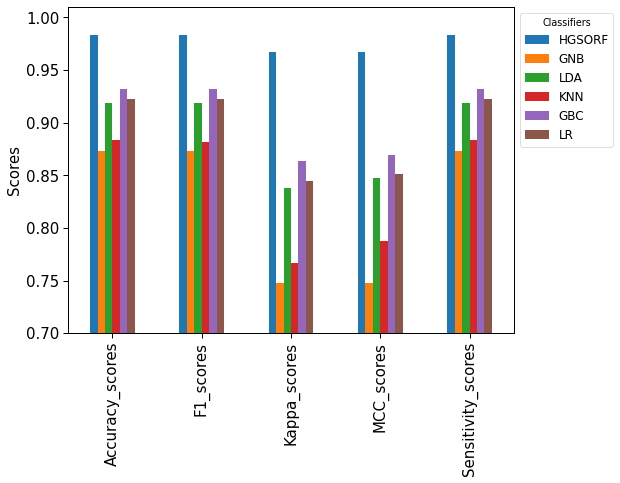

In [31]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
df_performance1.plot.bar(figsize=[8, 6], rot=90)
plt.ylim(.7, 1.01)
plt.ylabel('Scores', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title='Classifiers',
           bbox_to_anchor=(1, 1),
           loc='upper left',
           fontsize=12)
plt.savefig('performance_CS.png', bbox_inches='tight', dpi=600)

In [32]:
pred_rf = HGSORF_clf.predict(x_test)
y_pred_gnb = GNB_clf.predict(x_test)
y_pred_lda = LDA_clf.predict(x_test)
y_pred_knn = KNN_clf.predict(x_test)
y_pred_gbc = GBC.predict(x_test)
y_pred_lr = LR.predict(x_test)

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


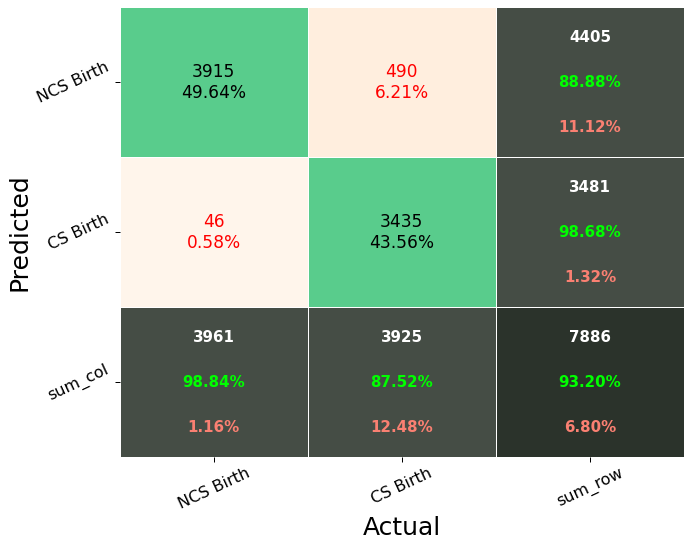

In [33]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_gbc,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_gbc.eps',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


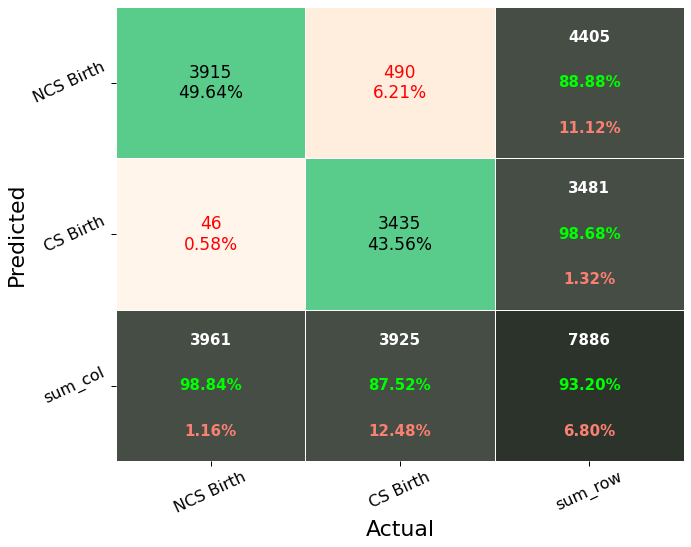

In [34]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_gbc,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_gbc.png',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


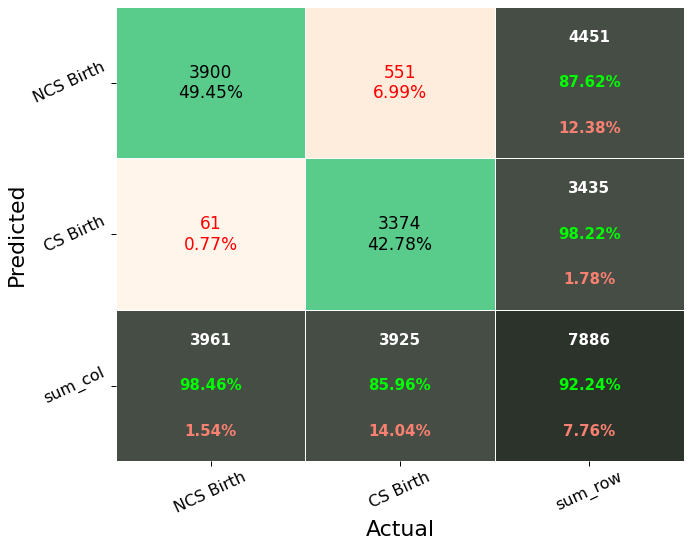

In [35]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_lr,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_lr.png',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


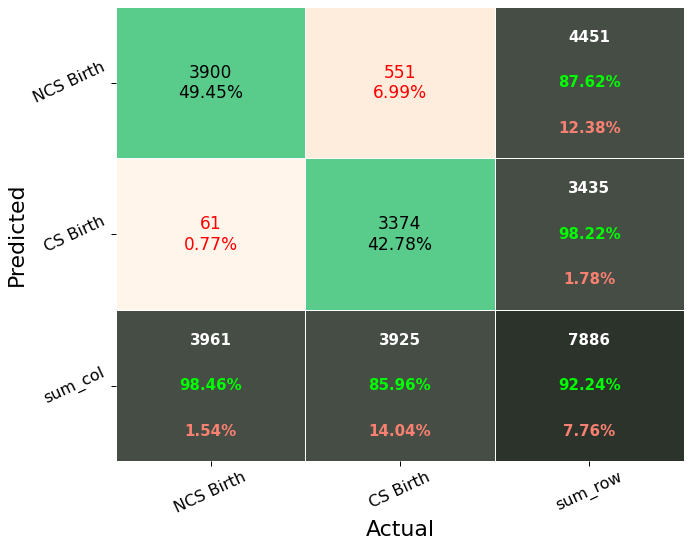

In [36]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_lr,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_lr.eps',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


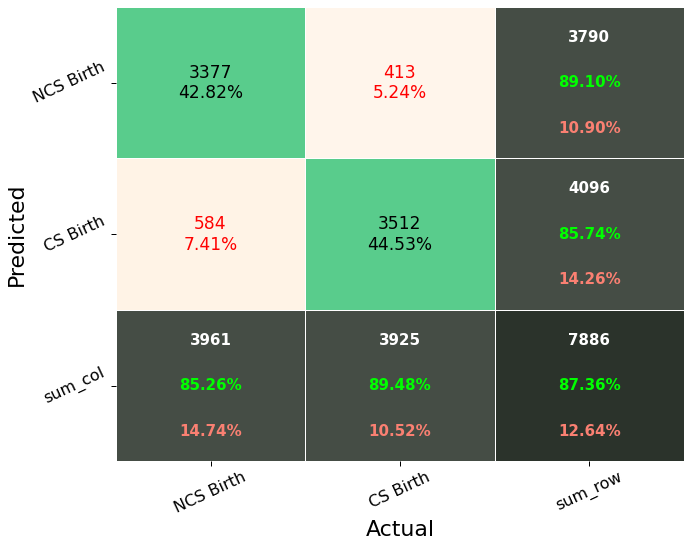

In [37]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_gnb,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_gnb.png',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


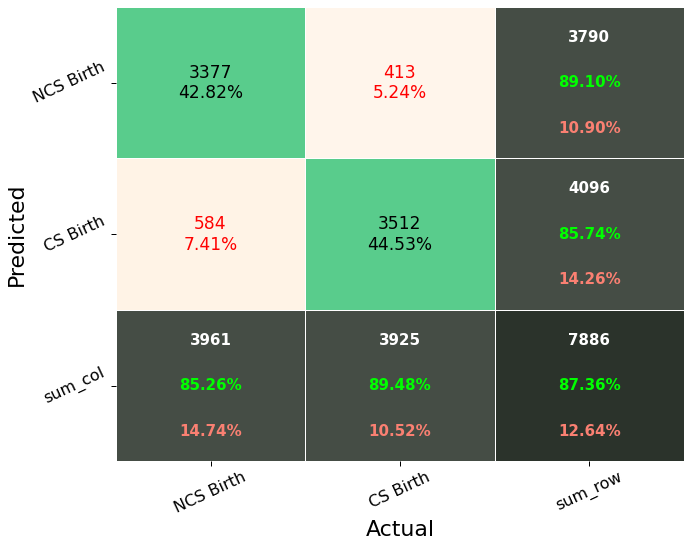

In [38]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_gnb,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_gnb.eps',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


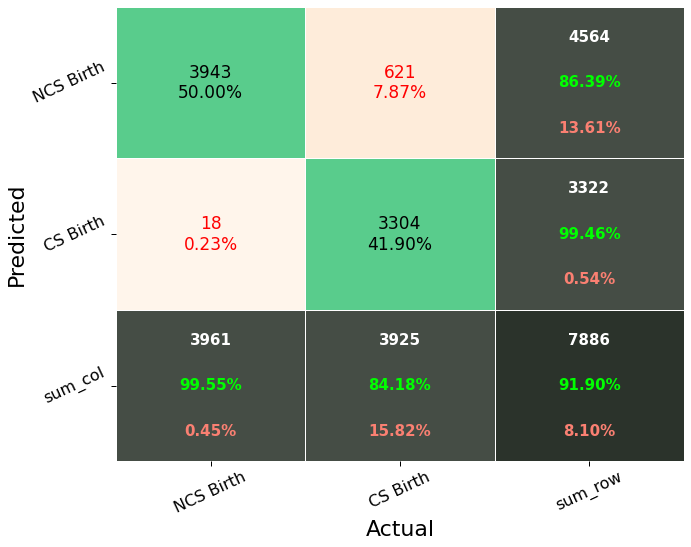

In [39]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_lda,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_lda.eps',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


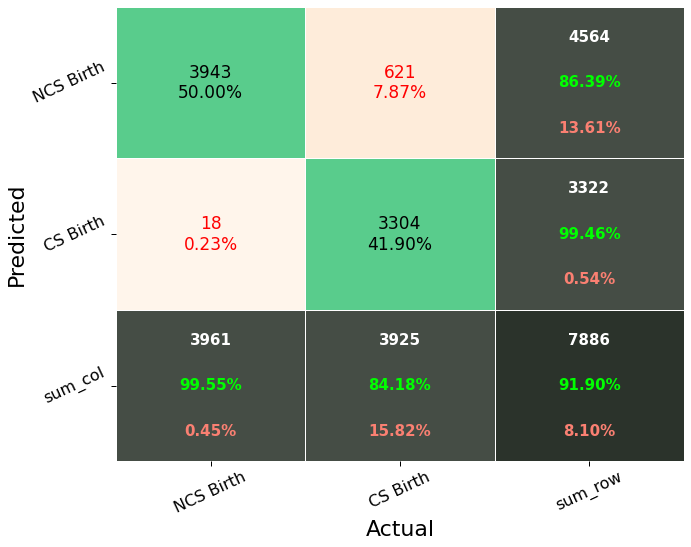

In [40]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_lda,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_lda.png',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


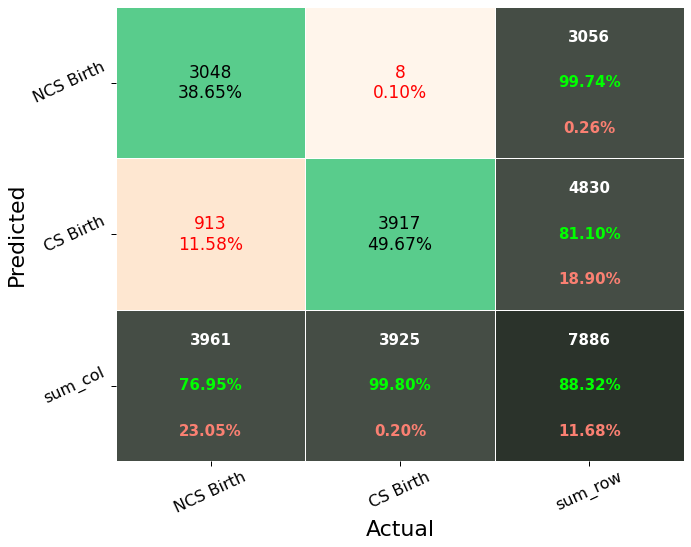

In [41]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_knn,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_knn.png',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


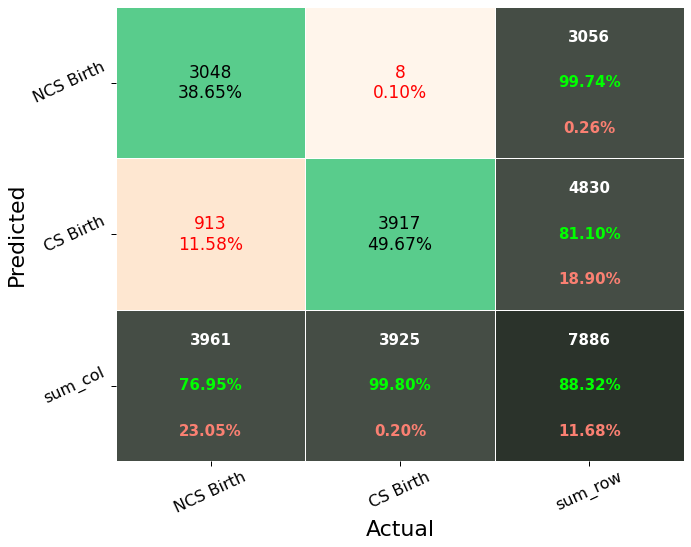

In [42]:
plot_confusion_matrix_from_data(y_test,
                                y_pred_knn,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_knn.eps',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


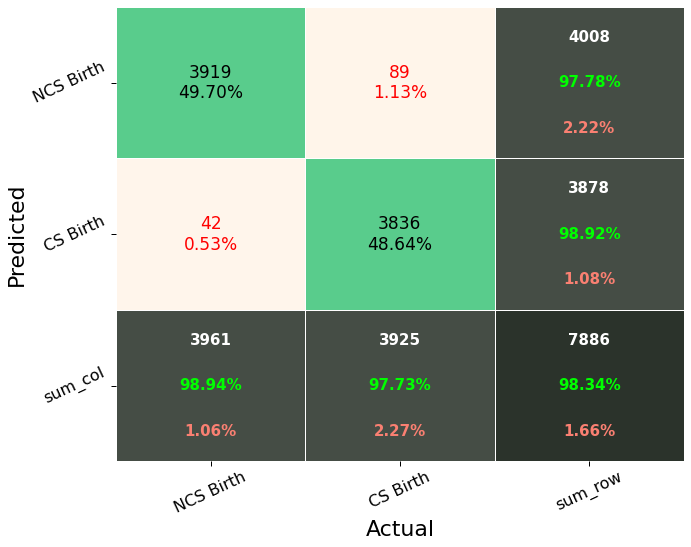

In [43]:
plot_confusion_matrix_from_data(y_test,
                                pred_rf,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_hgxorf.png',
                                figsize=[10, 8])

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


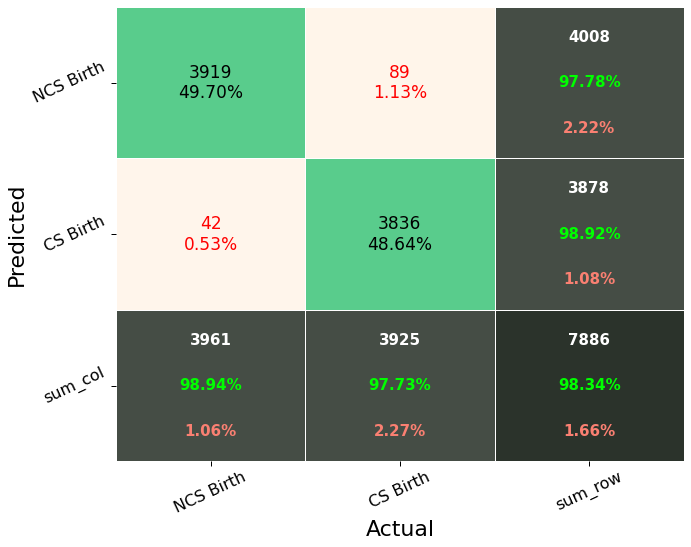

In [44]:
plot_confusion_matrix_from_data(y_test,
                                pred_rf,
                                columns=['NCS Birth', 'CS Birth'],
                                fz=17,
                                filename='csec_hgxorf.eps',
                                figsize=[10, 8])

In [45]:
explainer = shap.TreeExplainer(HGSORF_clf)

In [46]:
val=explainer.shap_values(x_train)

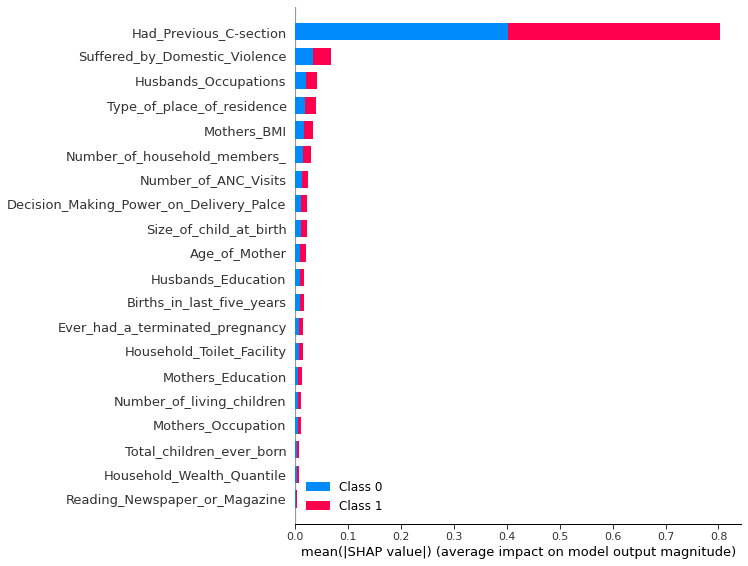

In [47]:
f = plt.figure()
shap.summary_plot(val, x_train)
f.savefig("summary_plot_CS.png", bbox_inches='tight', dpi=600)

In [48]:
exp=lime_tabular.LimeTabularExplainer(np.array(x_test),feature_names=x_train.columns,class_names=['NO','YES'],mode='classification')

In [49]:
f = plt.figure()
exp=lime_tabular.LimeTabularExplainer(np.array(x_test),feature_names=x_train.columns,class_names=['NO','YES'],mode='classification')
n=555
exp_m=exp.explain_instance(x_test.iloc[n],predict_fn=HGSORF_clf.predict_proba)
exp_m.show_in_notebook(show_table=True)
f.savefig("lime_.eps", bbox_inches='tight', dpi=600)
exp_m.save_to_file('lime_report_no.html')


<Figure size 432x288 with 0 Axes>

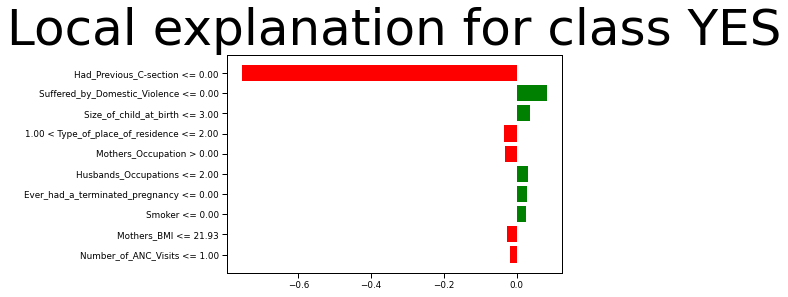

In [50]:
fig = exp_m.as_pyplot_figure(label=1)

fig.savefig('lime_report_CS.eps',bbox_inches='tight')

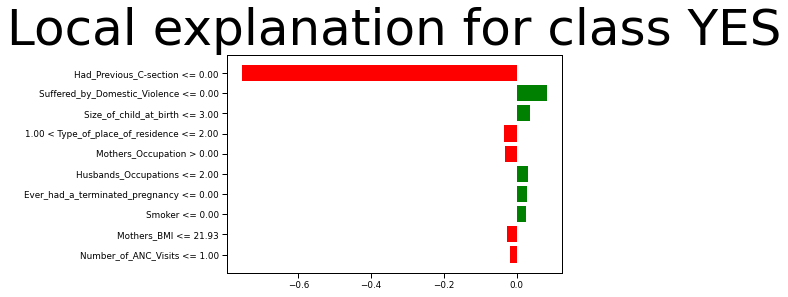

In [51]:
fig = exp_m.as_pyplot_figure()

fig.savefig('lime_report_CS.png',bbox_inches='tight')

In [53]:
HGSORF_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [54]:
X_train1=x_train.reset_index(drop=True)
y_train1=y_train.reset_index(drop=True)
X_test1=x_test.reset_index(drop=True)
y_test1=y_test.reset_index(drop=True)



results_org = bootstrap_model(
    HGSORF_clf,
    X_train1, 
    y_train1, 
    X_test1, 
    y_test1,
    100,   # change the number of bootstraps here
    0.5
)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


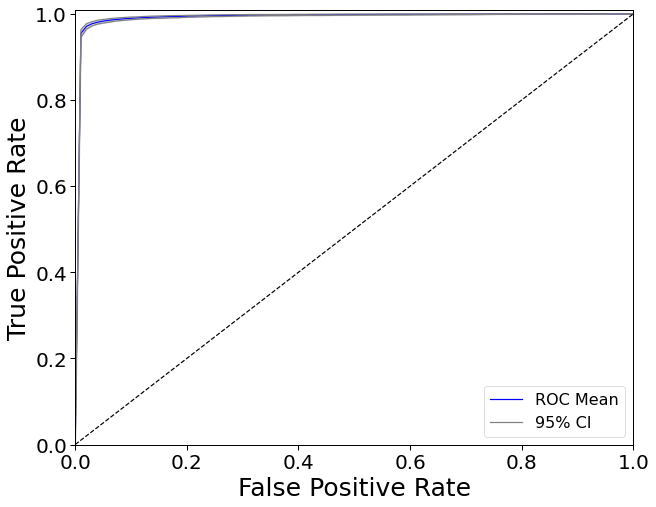

In [55]:
    
total_auc_org = []
for r in results_org['fpr_tpr']:
    total_auc_org.append(auc(r[0], r[1]))
total_auc_org
df_interp_org = pd.DataFrame(roc_interp(results_org['fpr_tpr'])).T
m_org = df_interp_org.mean(axis=1).values.tolist()
ci_org = df_interp_org.quantile([.025, .975], axis=1).values.tolist()

filename_bootstrap_org='Bootstrap_ROC_CS_fresh.eps'
plot_bootstrap_roc(m_org, ci_org,filename_bootstrap_org)



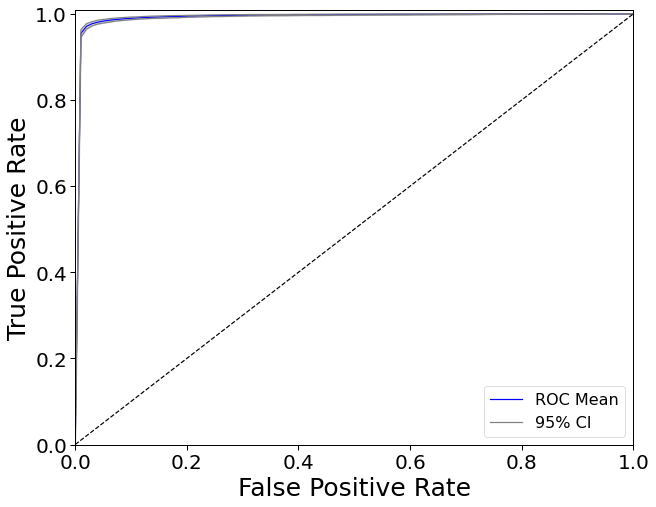

In [56]:

total_auc_org = []
for r in results_org['fpr_tpr']:
    total_auc_org.append(auc(r[0], r[1]))
total_auc_org
df_interp_org = pd.DataFrame(roc_interp(results_org['fpr_tpr'])).T
m_org = df_interp_org.mean(axis=1).values.tolist()
ci_org = df_interp_org.quantile([.025, .975], axis=1).values.tolist()

filename_bootstrap_org='Bootstrap_ROC_CS_fresh.png'
plot_bootstrap_roc(m_org, ci_org,filename_bootstrap_org)